# NON-LINEAR AND UNEQUAL-TIME EFFECTS

Here we analyse the non-linear and unequal-time effects when comparing the geometric approximation with the full unequal-time description, using both standard perturbation theory and effective field theory. We also analyse the effect from the new midpoint approximation.

In [5]:
import numpy as np
import pandas
from scipy.interpolate import interp1d
from astropy.cosmology import FlatLambdaCDM
from skypy.power_spectrum import growth_function

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams.update({
    'text.usetex': False,
    'font.family': 'serif',
    'legend.frameon': False,
    'legend.handlelength': 1.5,
})

## 1. Power spectra

In [10]:
import sys
sys.path.append("../")
from matter import matter_power_spectrum_1loop as Petc
from matter import matter_unequal_time_power_spectrum as Puetc
from analysis import unequal_power_squared as Puetc2
from analysis import geometric_approx_squared as Pgeom2
from analysis import midpoint_approx as Pmid

* Cosmology and normilised growth

In [12]:
cosmo = FlatLambdaCDM(H0=67.11, Ob0=0.049, Om0= 0.2685)

In [13]:
def Dz(redshift):
    return growth_function(redshift, cosmo)/growth_function(0, cosmo)

* Load FAST-PT loop contributions

In [22]:
d = np.loadtxt('../data/Pfastpt.txt',unpack=True)
k = d[:, 0]
pk, p22, p13 = d[:, 1], d[:, 2], d[:, 3]
p11_int = interp1d( k, pk, fill_value="extrapolate")
p22_int = interp1d( k, p22, fill_value="extrapolate")
p13_int = interp1d( k, p13, fill_value="extrapolate")
powerk = (p11_int, p22_int, p13_int)

## 2. Analysis

* Mean redshift and redshift separations

In [15]:
zm = 0.5
dz = 0.1 * np.arange(0, 5)

* Growth and counterterms

In [16]:
gzp = Dz(zm + dz)
gzm = Dz(zm - dz)

In [17]:
czp = np.sqrt(2.564 * np.exp(1.961 * (zm + dz)) + 0.036)
czm = np.sqrt(2.564 * np.exp(1.961 * (zm + dz)) + 0.036)

* Relative error

In [19]:
def error(p1, p2, reference):
    return np.abs(p1 - p2) / reference

### 2.1. Time effects

1) Standard Perturbation Theory

In [23]:
pgeom_spt2 = Pgeom2(k, gzm, gzp, powerk)
puetc_spt2 = Puetc2(k, gzm, gzp, powerk)

In [24]:
dp = [error(pgeom_spt2[0][i], puetc_spt2[0][i], puetc_spt2[0][i]) for i in range(3)]

2) Effective Field Theory

In [25]:
pgeom_eft2 = Pgeom2(k, gzm, gzp, powerk, czm, czp, model='eft')
puetc_eft2 = Puetc2(k, gzm, gzp, powerk, czm, czp, model='eft')

In [26]:
dpef = [error(pgeom_eft2[i][i], puetc_eft2[i][i], puetc_eft2[i][i]) for i in range(3)]

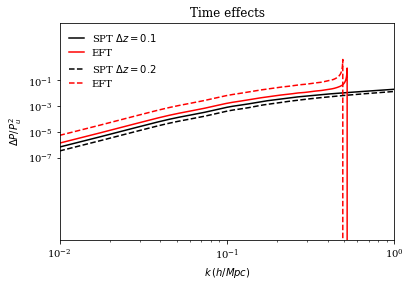

In [55]:
plt.plot(k, dp[1], 'k', label = r'SPT $\Delta z = 0.1$')
plt.plot(k, dpef[1], 'r', label = 'EFT')
plt.plot(k, dp[2], '--k', label = 'SPT $\Delta z = 0.2$')
plt.plot(k, dpef[2], '--r', label = 'EFT')

plt.xscale('log')
plt.yscale('log')
plt.xlim((1e-2,1e0))
plt.xlabel('$k\, (h/Mpc)$')
plt.ylabel('$\Delta P / P^2_u$')

plt.yticks(np.logspace(-7,-1, 4))
plt.title("Time effects")
plt.legend(frameon=False)

plt.show()

### 2.2. Non-linear physics

1) Geometric approximation

In [29]:
dp_geom = [error(pgeom_spt2[i][i], pgeom_eft2[i][i], pgeom_eft2[i][i]) for i in range(3)]

2) Unequal-time approach

In [30]:
dp_uetc = [error(puetc_spt2[i][i], puetc_eft2[i][i], puetc_eft2[i][i]) for i in range(3)]

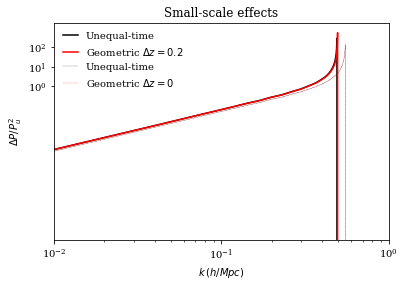

In [56]:
plt.plot(k, dp_uetc[2], 'k', label = 'Unequal-time')
plt.plot(k, dp_geom[2], 'r', label = 'Geometric $\Delta z = 0.2$')
plt.plot(k, dp_uetc[0], '--k', label = 'Unequal-time', lw=0.25)
plt.plot(k, dp_geom[0], '--r', label = 'Geometric $\Delta z = 0$', lw=0.25)

plt.xscale('log')
plt.yscale('log')
plt.xlim((1e-2,1e0))
plt.xlabel('$k\, (h/Mpc)$')
plt.ylabel('$\Delta P / P^2_u$')

plt.yticks(np.logspace(0,2, 3))
plt.title("Small-scale effects")
plt.legend(frameon=False);

plt.show()

## 3. Midpoint approximation

### 3.1. Fixed mean readshift, $z_m = 0.5$

In [45]:
cz = np.sqrt(2.564 * np.exp(1.961 * (zm)) + 0.036)

In [46]:
pmid_spt2 = Pgeom2(k, Dz(zm), Dz(zm), powerk)
pgeom_spt2 = Pgeom2(k, gzm, gzp, powerk)
puetc_spt2 = Puetc2(k, gzm, gzp, powerk)

In [47]:
dp = [error(pgeom_spt2[i][i], puetc_spt2[i][i], puetc_spt2[i][i]) for i in range(5)]

In [48]:
dpm = [error(pmid_spt2, puetc_spt2[i][i], puetc_spt2[i][i]) for i in range(5)]

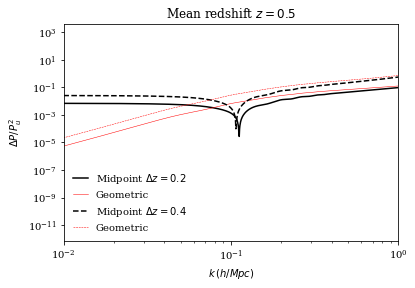

In [49]:
plt.plot(k, dpm[2], 'k', label = 'Midpoint $\Delta z = 0.2$')
plt.plot(k, dp[2], 'r', label = 'Geometric', lw=0.5)
plt.plot(k, dpm[4], '--k', label = 'Midpoint $\Delta z = 0.4$')
plt.plot(k, dp[4], '--r', label = 'Geometric', lw=0.5)

plt.xscale('log')
plt.yscale('log')
plt.xlim((1e-2,1e0))
plt.xlabel('$k\, (h/Mpc)$')
plt.ylabel('$\Delta P / P^2_u$')


plt.title("Mean redshift $z=0.5$")
plt.legend(frameon=False);

plt.show()

### 3.2. Fixed redshift separation, $\Delta z = 0.1$

In [50]:
zm2 = np.array([0.5, 1.0, 1.5])
dz2 = 0.1
gzp2 = Dz(zm2 + dz2)
gzm2 = Dz(zm2 - dz2)

In [51]:
pmid_spt2 = Pgeom2(k, Dz(zm2), Dz(zm2), powerk)
pgeom_spt2 = Pgeom2(k, gzm2, gzp2, powerk)
puetc_spt2 = Puetc2(k, gzm2, gzp2, powerk)

In [52]:
dp = [error(pgeom_spt2[i][i], puetc_spt2[i][i], puetc_spt2[i][i]) for i in range(3)]

In [53]:
dpm = [error(pmid_spt2[i][i], puetc_spt2[i][i], puetc_spt2[i][i]) for i in range(3)]

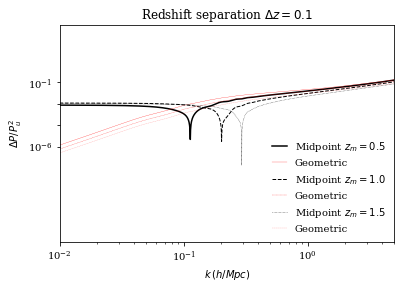

In [54]:
plt.plot(k, dpm[0], 'k', label = 'Midpoint $z_m = 0.5$')
plt.plot(k, dp[0], 'r', label = 'Geometric', lw=0.25)
plt.plot(k, dpm[1], '--k', label = 'Midpoint $z_m = 1.0$', lw=1)
plt.plot(k, dp[1], '--r', label = 'Geometric', lw=0.25)
plt.plot(k, dpm[2], ':k', label = 'Midpoint $z_m = 1.5$', lw=0.5)
plt.plot(k, dp[2], ':r', label = 'Geometric', lw=0.25)

plt.xscale('log')
plt.yscale('log')
plt.xlim((1e-2,5e0))
plt.xlabel('$k\, (h/Mpc)$')
plt.ylabel('$\Delta P / P^2_u$')

plt.yticks(np.logspace(-6,-1, 4))
plt.title("Redshift separation $\Delta z=0.1$")
plt.legend(frameon=False);

plt.show()